# 1. Collecting Comments

In [1]:
import urllib.request as req
import itertools
import pandas as pd
from bs4 import BeautifulSoup

# Define headers
user_agent = 'Chrome/108.0.0.0'
headers = {'User-Agent': user_agent}

# Base URL
base_url = "https://www.booking.com/reviews/gb/hotel/ibis-edinburgh-centre-st-andrew-square.en-gb.html?aid=357028;label=bin859jc-1DEgdyZXZpZXdzKIICOOgHSAlYA2hQiAEBmAEJuAEXyAEM2AED6AEB-AECiAIBqAIDuALorsuNBsACAdICJGJmMjRmNDIwLTMyMTQtNDVjZS05MDNmLTlhY2NjOWM1MTQ0ZdgCBOACAQ;sid=f12de9e50dc512b87c50bcfe5e61d99b;customer_type=total;hp_nav=0;old_page=0;order=featuredreviews;page="

# Generate URLs for multiple pages
url_l = ["{}{};r_lang=en;rows=75&".format(base_url, page) for page in range(1, 35)]

# Lists to store data
data, data1, data2, ratings = [], [], [], []

# Loop through each page
for pg in url_l:
    print(f"Fetching: {pg}")
    try:
        request = req.Request(pg, headers=headers)
        response = req.urlopen(request)

        soup = BeautifulSoup(response, 'html.parser')

        # Extract review content, stay date, reviewer name, and rating
        reviews = [x.get_text(strip=True) for x in soup.find_all("div", {"class": "review_item_review_content"})]
        stay_dates = [x.get_text(strip=True) for x in soup.find_all("p", {"class": "review_staydate"})]
        reviewer_names = [x.get_text(strip=True) for x in soup.find_all("p", {"class": "reviewer_name"})]
        review_ratings = [x.get_text(strip=True) for x in soup.find_all("span", {"class": "review-score-badge"})]  # Assuming rating is stored in review-score-badge

        data.append(reviews)
        data1.append(stay_dates)
        data2.append(reviewer_names)
        ratings.append(review_ratings)

    except req.HTTPError as e:
        print(f"HTTP Error: {e}")
    except req.URLError as e:
        print(f"URL Error: {e}")

# Flatten lists
f = list(itertools.chain(*data))
f1 = list(itertools.chain(*data1))
f2 = list(itertools.chain(*data2))
f3 = list(itertools.chain(*ratings))

# Find the max length of all lists
max_len = max(len(f), len(f1), len(f2), len(f3))

# Extend shorter lists with None to match the max length
f.extend([None] * (max_len - len(f)))
f1.extend([None] * (max_len - len(f1)))
f2.extend([None] * (max_len - len(f2)))
f3.extend([None] * (max_len - len(f3)))

# Create DataFrame
df = pd.DataFrame({
    'Date': f1,
    'Content': f,
    'Reviewer-Name': f2,
    'Rating': f3
})

# Display the first few rows
print(df.head())

# Save the DataFrame to a CSV file
df.to_csv('D:/FILES/reviews.csv', index=False)
print("Data saved to 'reviews.csv'")


Fetching: https://www.booking.com/reviews/gb/hotel/ibis-edinburgh-centre-st-andrew-square.en-gb.html?aid=357028;label=bin859jc-1DEgdyZXZpZXdzKIICOOgHSAlYA2hQiAEBmAEJuAEXyAEM2AED6AEB-AECiAIBqAIDuALorsuNBsACAdICJGJmMjRmNDIwLTMyMTQtNDVjZS05MDNmLTlhY2NjOWM1MTQ0ZdgCBOACAQ;sid=f12de9e50dc512b87c50bcfe5e61d99b;customer_type=total;hp_nav=0;old_page=0;order=featuredreviews;page=1;r_lang=en;rows=75&
Fetching: https://www.booking.com/reviews/gb/hotel/ibis-edinburgh-centre-st-andrew-square.en-gb.html?aid=357028;label=bin859jc-1DEgdyZXZpZXdzKIICOOgHSAlYA2hQiAEBmAEJuAEXyAEM2AED6AEB-AECiAIBqAIDuALorsuNBsACAdICJGJmMjRmNDIwLTMyMTQtNDVjZS05MDNmLTlhY2NjOWM1MTQ0ZdgCBOACAQ;sid=f12de9e50dc512b87c50bcfe5e61d99b;customer_type=total;hp_nav=0;old_page=0;order=featuredreviews;page=2;r_lang=en;rows=75&
Fetching: https://www.booking.com/reviews/gb/hotel/ibis-edinburgh-centre-st-andrew-square.en-gb.html?aid=357028;label=bin859jc-1DEgdyZXZpZXdzKIICOOgHSAlYA2hQiAEBmAEJuAEXyAEM2AED6AEB-AECiAIBqAIDuALorsuNBsACAdICJGJmM

# ___________________________________________
# Temporary
# ___________________________________________

In [1]:
# temporary

import pandas as pd

# خواندن فایل CSV و ذخیره در df
df = pd.read_csv("D:/FILES/reviews.csv")

# نمایش چند سطر اول برای بررسی داده‌ها
print(df.head())


                      Date                                            Content  \
0  Stayed in February 2025  Great central location, rooms small but perfec...   
1  Stayed in February 2025  BreakfastBreakfast was actually very average a...   
2  Stayed in December 2024  Everything but was so centralStayed in Decembe...   
3   Stayed in January 2025  The room was a bit cold when we first went in,...   
4   Stayed in January 2025  Unfortunately not much in the way of vegan opt...   

  Reviewer-Name  Rating  
0          Jill     8.7  
1        Taylor     9.0  
2          Kate     8.0  
3          Mike    10.0  
4        Tariro     9.0  


## Display Data

In [2]:
df

,Date,Content,Reviewer-Name,Rating
0,Stayed in February 2025,"Great central location, rooms small but perfec...",Jill,8.7
1,Stayed in February 2025,BreakfastBreakfast was actually very average a...,Taylor,9.0
2,Stayed in December 2024,Everything but was so centralStayed in Decembe...,Kate,8.0
3,Stayed in January 2025,"The room was a bit cold when we first went in,...",Mike,10.0
4,Stayed in January 2025,Unfortunately not much in the way of vegan opt...,Tariro,9.0
...,...,...,...,...
878,NaN,NaN,NaN,9.0
879,NaN,NaN,NaN,8.0
880,NaN,NaN,NaN,9.0
881,NaN,NaN,NaN,10.0


## Remove none rows

In [2]:
# حذف سطرهایی که مقدار 'Content' در آن‌ها خالی (""), مقدار None یا مقدار NaN باشد
df = df[df['Content'].notna() & (df['Content'] != "") & (df['Content'].str.lower() != "none")]

# نمایش دیتافریم پس از پاکسازی
df

,Date,Content,Reviewer-Name,Rating
0,Stayed in February 2025,"Great central location, rooms small but perfec...",Jill,8.7
1,Stayed in February 2025,BreakfastBreakfast was actually very average a...,Taylor,9.0
2,Stayed in December 2024,Everything but was so centralStayed in Decembe...,Kate,8.0
3,Stayed in January 2025,"The room was a bit cold when we first went in,...",Mike,10.0
4,Stayed in January 2025,Unfortunately not much in the way of vegan opt...,Tariro,9.0
...,...,...,...,...
844,Stayed in February 2022,Nothing to dislike. All goodExcellent location...,Gareth,10.0
845,Stayed in February 2022,bedroom was very small and basicquite funky de...,Joanna,10.0
846,Stayed in February 2022,the location and breakfast was really niceStay...,Mark,10.0
847,Stayed in February 2022,NothingLocation was superb for our trip. Staff...,Stephen,10.0


## Investigating Data

   Rating  Count
2     8.0    224
3     8.7     33
1     9.0    243
4     9.6      1
0    10.0    348


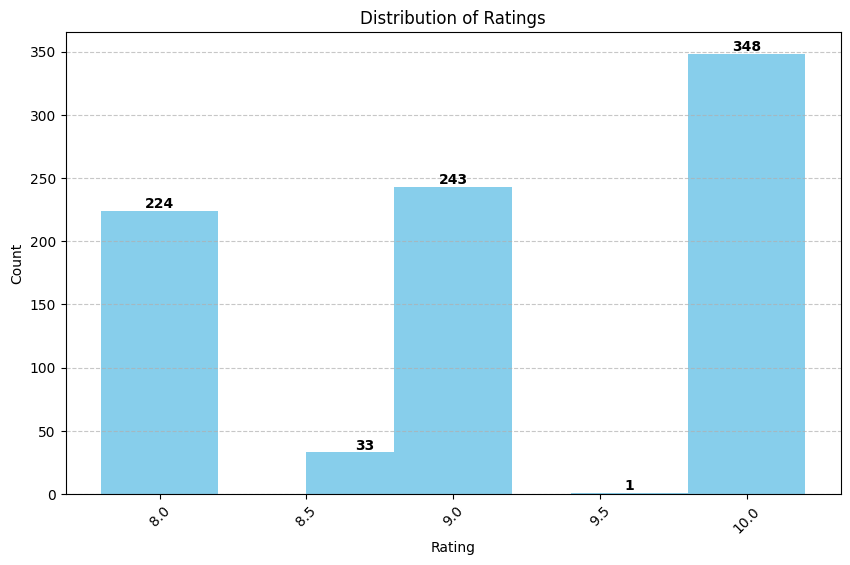

In [4]:
import matplotlib.pyplot as plt

# شمارش تعداد تکرار هر مقدار در ستون 'Rating' و مرتب‌سازی بر اساس مقدار Rating
rating_counts = df['Rating'].value_counts().reset_index()
rating_counts.columns = ['Rating', 'Count']

# تبدیل 'Rating' به عدد برای مرتب‌سازی صحیح
rating_counts['Rating'] = rating_counts['Rating'].astype(float)

# مرتب‌سازی بر اساس مقدار Rating
rating_counts = rating_counts.sort_values(by='Rating')

# نمایش جدول تعداد تکرارها
print(rating_counts)

# رسم نمودار ستونی
plt.figure(figsize=(10, 6))
bars = plt.bar(rating_counts['Rating'], rating_counts['Count'], color='skyblue', width=0.4)

# اضافه کردن مقدار تعداد بالای هر ستون
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10, fontweight='bold')

# تنظیمات نمودار
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.xticks(rotation=45)  # چرخش برچسب‌های محور افقی برای خوانایی بهتر
plt.grid(axis='y', linestyle='--', alpha=0.7)

# نمایش نمودار
plt.show()

## Data Augmentation

In [3]:
import numpy as np

# تعداد داده‌های موجود
num_existing = len(df)
# print(num_existing)

# تعداد داده‌های مورد نیاز برای تکمیل بازه 1 تا 7
# num_new = num_existing // 2  # ایجاد 50% داده جدید نسبت به تعداد کل
num_new = num_existing * 2

# ایجاد داده‌های جدید با مقدار Rating بین 1 تا 7
new_ratings = np.random.randint(1, 8, size=num_new)  # تولید مقادیر تصادفی بین 1 تا 7

# تعیین محتویات متن براساس مقدار Rating
new_contents = ['bad' if rating <= 4 else 'not good, not bad' for rating in new_ratings]

# ایجاد DataFrame جدید
df_new = pd.DataFrame({
    'Rating': new_ratings,
    'Content': new_contents,  # مقدار متن برای داده‌های مصنوعی
    'Date': ['2025-01-01'] * num_new,  # مقدار پیش‌فرض برای تاریخ
    'Reviewer-Name': ['Anonymous'] * num_new  # مقدار پیش‌فرض برای نام نویسنده
})

# ترکیب داده‌های اصلی و جدید
df_balanced = pd.concat([df, df_new], ignore_index=True)

# اطمینان از اینکه ستون 'Rating' از نوع عددی است
df_balanced['Rating'] = pd.to_numeric(df_balanced['Rating'], errors='coerce')

# نمایش توزیع جدید داده‌ها
print(df_balanced['Rating'].value_counts().sort_index())

# # Save the DataFrame to a CSV file
# df_balanced.to_csv('D:/FILES/reviews_balanced.csv', index=False)

1.0     275
2.0     244
3.0     229
4.0     225
5.0     239
6.0     249
7.0     237
8.0     224
8.7      33
9.0     243
9.6       1
10.0    348
Name: Rating, dtype: int64


## Update Negative Content

In [4]:

# جملات مربوط به rating های 1 تا 4
content_updates = [
    "The room had a strange smell, and the air conditioning wasn’t working properly. Very disappointing.",
    "Check-in took forever! We had to wait more than an hour just to get our room.",
    "The walls are paper-thin. I could hear everything from the next room. Hard to sleep.",
    "The staff was rude and unhelpful. I asked for a towel, and it took them three hours!",
    "Not worth the money. The rooms are much smaller than advertised, and the furniture is old.",
    "The bathroom wasn’t clean, and the towels smelled bad. Definitely not a 4-star experience.",
    "Horrible experience! There was mold in the shower, and the sheets looked unwashed.",
    "The hotel is located in a noisy area, and I barely got any sleep due to street noise.",
    "Wi-Fi was extremely slow and kept disconnecting. If you need internet, avoid this place.",
    "I booked a room with a view, but they gave me one facing a wall. Very misleading!",
    "The staff didn't speak English."
]

# تابع برای آپدیت کردن محتوا
def update_content(row):
    if 1 <= row['Rating'] <= 4:
        # انتخاب یکی از جملات به صورت تصادفی
        return content_updates[row.name % len(content_updates)]  # row.name برای انتخاب تصادفی
    return row['Content']  # اگر rating بیشتر از 4 باشد، همان محتوا باقی می‌ماند

# اعمال تابع به ستون 'content'
df_balanced['Content'] = df_balanced.apply(update_content, axis=1)

# فیلتر کردن سطرهایی که rating آنها بین 1 تا 4 است
filtered_df = df_balanced[(df_balanced['Rating'] >= 1) & (df_balanced['Rating'] <= 4)]

# نمایش سطرهای فیلتر شده
print(filtered_df[['Rating', 'Content']].head())


     Rating                                            Content
849     4.0  The walls are paper-thin. I could hear everyth...
850     2.0  The staff was rude and unhelpful. I asked for ...
851     3.0  Not worth the money. The rooms are much smalle...
854     2.0  The hotel is located in a noisy area, and I ba...
855     2.0  Wi-Fi was extremely slow and kept disconnectin...


## Update Neutral Content

In [5]:
# جملات مربوط به rating های 5 تا 7
content_updates_5_to_7 = [
    "The hotel was okay. Nothing special, but nothing terrible either. It served its purpose.",
    "Stayed for one night. The room was clean, but the decor was outdated. It was fine overall.",
    "Breakfast was decent, but nothing extraordinary. A typical hotel experience.",
    "The staff was polite, but not particularly friendly. It was an average stay.",
    "Location was convenient, but the hotel itself felt a bit old. Not bad, not great."
]

# تابع برای آپدیت کردن محتوا
def update_content_5_to_7(row):
    if 5 <= row['Rating'] <= 7:
        # انتخاب یکی از جملات به صورت تصادفی
        return content_updates_5_to_7[row.name % len(content_updates_5_to_7)]  # row.name برای انتخاب تصادفی
    return row['Content']  # اگر rating بیشتر از 7 یا کمتر از 5 باشد، همان محتوا باقی می‌ماند

# اعمال تابع به ستون 'content'
df_balanced['Content'] = df_balanced.apply(update_content_5_to_7, axis=1)

# فیلتر کردن سطرهایی که rating آنها بین 1 تا 4 است
filtered_df = df_balanced[(df_balanced['Rating'] >= 5) & (df_balanced['Rating'] <= 7)]

# نمایش سطرهای فیلتر شده
print(filtered_df[['Rating', 'Content']].head())


     Rating                                            Content
852     7.0  Breakfast was decent, but nothing extraordinar...
853     7.0  The staff was polite, but not particularly fri...
856     6.0  Stayed for one night. The room was clean, but ...
859     7.0  Location was convenient, but the hotel itself ...
863     5.0  The staff was polite, but not particularly fri...


## Showing Balanced Data

    Rating  Count
9      1.0    215
1      2.0    267
6      3.0    243
2      4.0    255
8      5.0    216
3      6.0    252
4      7.0    250
7      8.0    224
10     8.7     33
5      9.0    243
11     9.6      1
0     10.0    348


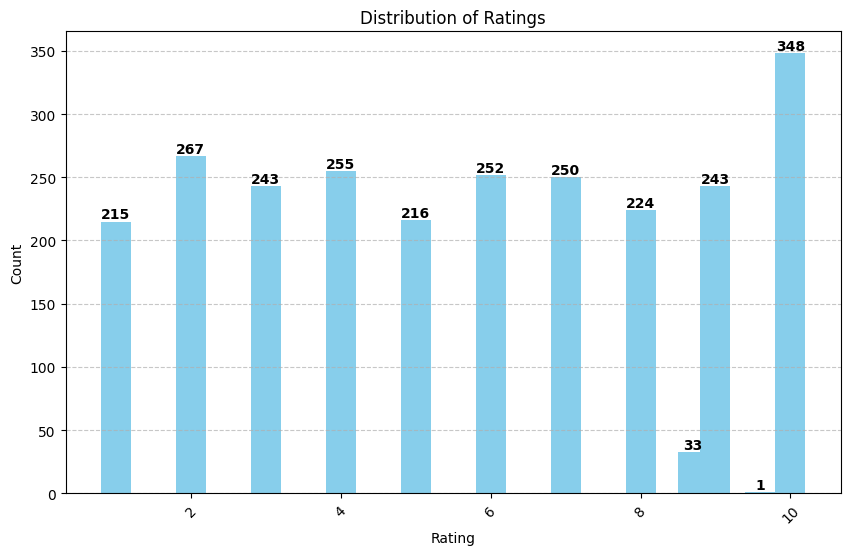

In [31]:

# شمارش تعداد تکرار هر مقدار در ستون 'Rating' و مرتب‌سازی بر اساس مقدار Rating
rating_counts = df_balanced['Rating'].value_counts().reset_index()
rating_counts.columns = ['Rating', 'Count']

# تبدیل 'Rating' به عدد برای مرتب‌سازی صحیح
rating_counts['Rating'] = rating_counts['Rating'].astype(float)

# مرتب‌سازی بر اساس مقدار Rating
rating_counts = rating_counts.sort_values(by='Rating')

# نمایش جدول تعداد تکرارها
print(rating_counts)

# رسم نمودار ستونی
plt.figure(figsize=(10, 6))
bars = plt.bar(rating_counts['Rating'], rating_counts['Count'], color='skyblue', width=0.4)

# اضافه کردن مقدار تعداد بالای هر ستون
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10, fontweight='bold')

# تنظیمات نمودار
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.xticks(rotation=45)  # چرخش برچسب‌های محور افقی برای خوانایی بهتر
plt.grid(axis='y', linestyle='--', alpha=0.7)

# نمایش نمودار
plt.show()

## Balanced Data

In [32]:
print(df_balanced.head()) 

,Date,Content,Reviewer-Name,Rating,label,Content_Tokens,Uni-grams,Bi-grams,Sentiment,Positive_Score,Negative_Score,Neutral_Score,Compound_Score,VADER_SentimentAnalysis,Sentiment_TextBlob,Polarity_Score_TextBlob,Subjectivity_Score_TextBlob,textblob_SentimentAnalysis
0,Stayed in February 2025,great central location rooms small perfectstay...,Jill,8.7,positive,"[great, central, location, rooms, small, perfe...","[(great,), (central,), (location,), (rooms,), ...","[(great, central), (central, location), (locat...","{'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'comp...",0.406,0.000,0.594,0.6249,positive,"{'Polarity': 0.18333333333333335, 'Subjectivit...",0.183333,0.466667,positive
1,Stayed in February 2025,breakfastbreakfast actually average area impro...,Taylor,9.0,positive,"[breakfastbreakfast, actually, average, area, ...","[(breakfastbreakfast,), (actually,), (average,...","[(breakfastbreakfast, actually), (actually, av...","{'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'comp...",0.279,0.000,0.721,0.4767,neutral,"{'Polarity': -0.075, 'Subjectivity': 0.1999999...",-0.075000,0.200000,neutral
2,Stayed in December 2024,centralstayed december,Kate,8.0,positive,"[centralstayed, december]","[(centralstayed,), (december,)]","[(centralstayed, december)]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral,"{'Polarity': 0.0, 'Subjectivity': 0.0}",0.000000,0.000000,neutral
3,Stayed in January 2025,room bit cold went heating bit quirky did goin...,Mike,10.0,positive,"[room, bit, cold, went, heating, bit, quirky, ...","[(room,), (bit,), (cold,), (went,), (heating,)...","[(room, bit), (bit, cold), (cold, went), (went...","{'neg': 0.0, 'neu': 0.642, 'pos': 0.358, 'comp...",0.358,0.000,0.642,0.9451,positive,"{'Polarity': 0.25166666666666665, 'Subjectivit...",0.251667,0.640000,positive
4,Stayed in January 2025,unfortunately way vegan options included break...,Tariro,9.0,positive,"[unfortunately, way, vegan, options, included,...","[(unfortunately,), (way,), (vegan,), (options,...","[(unfortunately, way), (way, vegan), (vegan, o...","{'neg': 0.087, 'neu': 0.505, 'pos': 0.408, 'co...",0.408,0.087,0.505,0.8360,positive,"{'Polarity': 0.19999999999999998, 'Subjectivit...",0.200000,0.613889,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2542,2025-01-01,breakfast decent extraordinary typical hotel e...,Anonymous,6.0,neutral,"[breakfast, decent, extraordinary, typical, ho...","[(breakfast,), (decent,), (extraordinary,), (t...","[(breakfast, decent), (decent, extraordinary),...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,neutral,"{'Polarity': 0.11111111111111112, 'Subjectivit...",0.111111,0.722222,positive
2543,2025-01-01,The walls are paper-thin. I could hear everyth...,Anonymous,3.0,negative,"[staff, rude, unhelpful, asked, towel, took, h...","[(staff,), (rude,), (unhelpful,), (asked,), (t...","[(staff, rude), (rude, unhelpful), (unhelpful,...","{'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'comp...",0.000,0.333,0.667,-0.4588,neutral,"{'Polarity': -0.3, 'Subjectivity': 0.6}",-0.300000,0.600000,negative
2544,2025-01-01,The staff was rude and unhelpful. I asked for ...,Anonymous,3.0,negative,"[worth, money, rooms, smaller, advertised, fur...","[(worth,), (money,), (rooms,), (smaller,), (ad...","[(worth, money), (money, rooms), (rooms, small...","{'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'comp...",0.241,0.000,0.759,0.2263,neutral,"{'Polarity': 0.13333333333333333, 'Subjectivit...",0.133333,0.266667,positive
2545,2025-01-01,hotel okay special terrible served purpose,Anonymous,6.0,neutral,"[hotel, okay, special, terrible, served, purpose]","[(hotel,), (okay,), (special,), (terrible,), (...","[(hotel, okay), (okay, special), (special, ter...","{'neg': 0.29, 'neu': 0.28, 'pos': 0.43, 'compo...",0.430,0.290,0.280,0.1280,neutral,"{'Polarity': -0.047619047619047596, 'Subjectiv...",-0.047619,0.690476,neutral


## Adding Lable

In [6]:
# اضافه کردن ستون 'label' بر اساس مقدار 'Rating'
df_balanced['label'] = pd.cut(df_balanced['Rating'], 
                               bins=[0, 4, 7, 10], 
                               labels=['negative', 'neutral', 'positive'], 
                               right=True)

# نمایش نتایج
print(df_balanced.head()) 


                      Date                                            Content  \
0  Stayed in February 2025  Great central location, rooms small but perfec...   
1  Stayed in February 2025  BreakfastBreakfast was actually very average a...   
2  Stayed in December 2024  Everything but was so centralStayed in Decembe...   
3   Stayed in January 2025  The room was a bit cold when we first went in,...   
4   Stayed in January 2025  Unfortunately not much in the way of vegan opt...   

  Reviewer-Name  Rating     label  
0          Jill     8.7  positive  
1        Taylor     9.0  positive  
2          Kate     8.0  positive  
3          Mike    10.0  positive  
4        Tariro     9.0  positive  


# 2. Preprocessing
## Text Cleaning

In [7]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# تابع برای حذف نویز (عددها، علائم نگارشی و فاصله‌های اضافی)
def clean_text(text):
    if isinstance(text, str):  # بررسی اینکه آیا ورودی از نوع رشته است
        # حذف عددها
        text = re.sub(r'\d+', '', text)
        # حذف علائم نگارشی
        text = re.sub(r'[^\w\s]', '', text)
        # حذف فاصله‌های اضافی
        text = re.sub(r'\s+', ' ', text).strip()
        # تبدیل متن به حروف کوچک
        text = text.lower()
        # حذف کلمات زائد (Stopwords)
        text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    return text

# اعمال پاکسازی بر روی ستون 'Content'
df_balanced['Content'] = df_balanced['Content'].apply(clean_text)

# نمایش دیتافریم بعد از اعمال تغییرات
print(df_balanced.head())  # نمایش ۵ ردیف اول دیتافریم


                      Date                                            Content  \
0  Stayed in February 2025  great central location rooms small perfectstay...   
1  Stayed in February 2025  breakfastbreakfast actually average area impro...   
2  Stayed in December 2024                             centralstayed december   
3   Stayed in January 2025  room bit cold went heating bit quirky did goin...   
4   Stayed in January 2025  unfortunately way vegan options included break...   

  Reviewer-Name  Rating     label  
0          Jill     8.7  positive  
1        Taylor     9.0  positive  
2          Kate     8.0  positive  
3          Mike    10.0  positive  
4        Tariro     9.0  positive  


## Tokenize

In [8]:
import nltk
from nltk.tokenize import word_tokenize

# بارگذاری منابع لازم برای tokenization
nltk.download('punkt')

# تابع برای اعمال tokenization بر روی متن
def tokenize_text(text):
    if isinstance(text, str):  # بررسی اینکه آیا ورودی از نوع رشته است
        tokens = word_tokenize(text)  # انجام tokenization
        return tokens
    return []

# اعمال tokenization بر روی ستون 'Content'
df_balanced['Content_Tokens'] = df_balanced['Content'].apply(tokenize_text)

# نمایش دیتافریم بعد از اعمال tokenization
print(df_balanced[['Content', 'Content_Tokens']].head())


[nltk_data] Downloading package punkt to C:\Users\AFERI/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                             Content  \
0  great central location rooms small perfectstay...   
1  breakfastbreakfast actually average area impro...   
2                             centralstayed december   
3  room bit cold went heating bit quirky did goin...   
4  unfortunately way vegan options included break...   

                                      Content_Tokens  
0  [great, central, location, rooms, small, perfe...  
1  [breakfastbreakfast, actually, average, area, ...  
2                          [centralstayed, december]  
3  [room, bit, cold, went, heating, bit, quirky, ...  
4  [unfortunately, way, vegan, options, included,...  


## n-grams

In [9]:
from nltk.util import ngrams

# تابع برای تشکیل n-gram
def generate_ngrams(tokens, n):
    return list(ngrams(tokens, n))

# اعمال Uni-gram (n=1) و Bi-gram (n=2) بر روی ستون 'Content_Tokens'
df_balanced['Uni-grams'] = df_balanced['Content_Tokens'].apply(lambda tokens: generate_ngrams(tokens, 1))  # Uni-gram
df_balanced['Bi-grams'] = df_balanced['Content_Tokens'].apply(lambda tokens: generate_ngrams(tokens, 2))  # Bi-gram

# نمایش دیتافریم بعد از اعمال n-grams
print(df_balanced[['Content_Tokens', 'Uni-grams', 'Bi-grams']].head())


                                      Content_Tokens  \
0  [great, central, location, rooms, small, perfe...   
1  [breakfastbreakfast, actually, average, area, ...   
2                          [centralstayed, december]   
3  [room, bit, cold, went, heating, bit, quirky, ...   
4  [unfortunately, way, vegan, options, included,...   

                                           Uni-grams  \
0  [(great,), (central,), (location,), (rooms,), ...   
1  [(breakfastbreakfast,), (actually,), (average,...   
2                    [(centralstayed,), (december,)]   
3  [(room,), (bit,), (cold,), (went,), (heating,)...   
4  [(unfortunately,), (way,), (vegan,), (options,...   

                                            Bi-grams  
0  [(great, central), (central, location), (locat...  
1  [(breakfastbreakfast, actually), (actually, av...  
2                        [(centralstayed, december)]  
3  [(room, bit), (bit, cold), (cold, went), (went...  
4  [(unfortunately, way), (way, vegan), (vegan, o..

# 3. Sentiment Analysis

## VADAR Using Content

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\AFERI/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                             Content  Positive_Score  \
0  great central location rooms small perfectstay...           0.406   
1  breakfastbreakfast actually average area impro...           0.279   
2                             centralstayed december           0.000   
3  room bit cold went heating bit quirky did goin...           0.358   
4  unfortunately way vegan options included break...           0.408   

   Negative_Score  Neutral_Score  Compound_Score  
0           0.000          0.594          0.6249  
1           0.000          0.721          0.4767  
2           0.000          1.000          0.0000  
3           0.000          0.642          0.9451  
4           0.087          0.505          0.8360  
                                             Content  Positive_Score  \
0  great central location rooms small perfectstay...           0.406   
1  breakfastbreakfast actually average area impro...           0.279   
2                             centralstayed d

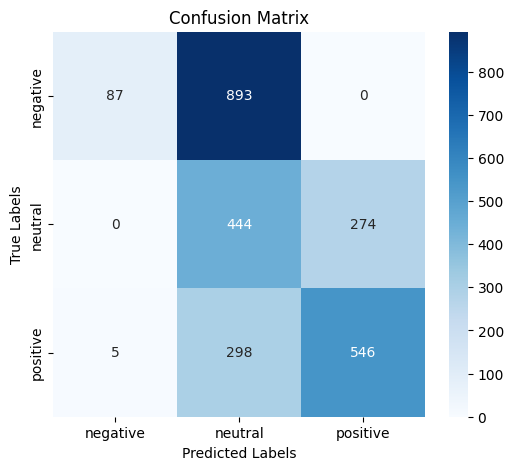

In [37]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from rich.console import Console

# بارگذاری مدل VADER
nltk.download('vader_lexicon')

# ایجاد یک شیء از SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# تابع برای انجام تحلیل احساس
def analyze_sentiment(text):
    if isinstance(text, str):
        # تحلیل احساس متن با استفاده از VADER
        sentiment_score = sia.polarity_scores(text)
        return sentiment_score
    return {}

# اعمال تحلیل احساس بر روی ستون 'Content'
df_balanced['Sentiment'] = df_balanced['Content'].apply(analyze_sentiment)

# استخراج نمرات مثبت، منفی و خنثی از نتایج تحلیل
df_balanced['Positive_Score'] = df_balanced['Sentiment'].apply(lambda x: x.get('pos', 0))
df_balanced['Negative_Score'] = df_balanced['Sentiment'].apply(lambda x: x.get('neg', 0))
df_balanced['Neutral_Score'] = df_balanced['Sentiment'].apply(lambda x: x.get('neu', 0))
df_balanced['Compound_Score'] = df_balanced['Sentiment'].apply(lambda x: x.get('compound', 0))

# نمایش دیتافریم بعد از تحلیل احساس
print(df_balanced[['Content', 'Positive_Score', 'Negative_Score', 'Neutral_Score', 'Compound_Score']].head())

# اضافه کردن ستون 'VADER_SentimentAnalysis' بر اساس مقدار 'Compound_Score'
def get_vader_sentiment_analysis(compound_score):
    if compound_score < -0.5:
        return 'negative'
    elif compound_score > 0.5:
        return 'positive'
    else:
        return 'neutral'

df_balanced['VADER_SentimentAnalysis'] = df_balanced['Compound_Score'].apply(get_vader_sentiment_analysis)

# نمایش دیتافریم بعد از تحلیل احساس
print(df_balanced[['Content', 'Positive_Score', 'Negative_Score', 'Neutral_Score', 'Compound_Score', 'VADER_SentimentAnalysis']].head())

#  تعریف کلاس‌ها
labels = ['negative', 'neutral', 'positive']

console = Console()
console.print("[bold red]VADAR Using Content[/bold red]")

# محاسبه معیارهای ارزیابی مدل
accuracy = accuracy_score(df_balanced['label'], df_balanced['VADER_SentimentAnalysis'])
recall = recall_score(df_balanced['label'], df_balanced['VADER_SentimentAnalysis'], average='weighted')
f1 = f1_score(df_balanced['label'], df_balanced['VADER_SentimentAnalysis'], average='weighted')

#  نمایش معیارها در قالب جدول
print("\n **Performance Metrics:**")
print(f"{'Metric':<12}{'Value':>8}")
print(f"{'-'*22}")
print(f"{'Accuracy':<12}{accuracy:.2f}")
print(f"{'Recall':<12}{recall:.2f}")
print(f"{'F1-Score':<12}{f1:.2f}")

#  محاسبه و نمایش ماتریس سردرگمی
conf_matrix = confusion_matrix(df_balanced['label'], df_balanced['VADER_SentimentAnalysis'], labels=labels)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## TextBlob

                                             Content  Polarity_Score_TextBlob  \
0  great central location rooms small perfectstay...                 0.183333   
1  breakfastbreakfast actually average area impro...                -0.075000   
2                             centralstayed december                 0.000000   
3  room bit cold went heating bit quirky did goin...                 0.251667   
4  unfortunately way vegan options included break...                 0.200000   

   Subjectivity_Score_TextBlob textblob_SentimentAnalysis  
0                     0.466667                   positive  
1                     0.200000                    neutral  
2                     0.000000                    neutral  
3                     0.640000                   positive  
4                     0.613889                   positive  
Accuracy: 0.63
Recall: 0.63
F1-score: 0.64


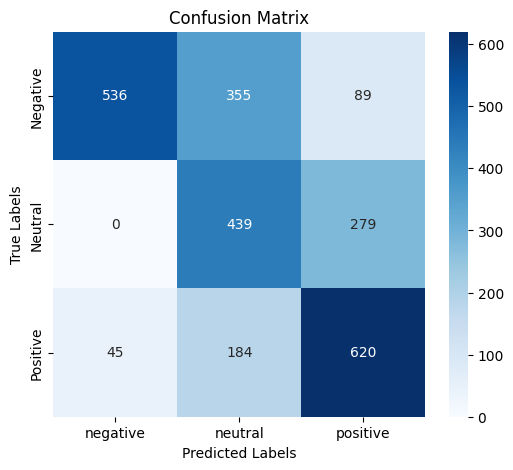

In [38]:
from textblob import TextBlob

# تابع برای انجام تحلیل احساس با TextBlob
def analyze_sentiment_textblob(text):
    if isinstance(text, str):
        # ایجاد یک شیء TextBlob برای تحلیل احساس
        blob = TextBlob(text)
        # محاسبه نمرات polarity و subjectivity
        return {'Polarity': blob.sentiment.polarity, 'Subjectivity': blob.sentiment.subjectivity}
    return {'Polarity': 0, 'Subjectivity': 0}

# اعمال تحلیل احساس با TextBlob بر روی ستون 'Content'
df_balanced['Sentiment_TextBlob'] = df_balanced['Content'].apply(analyze_sentiment_textblob)

# استخراج نمرات Polarity و Subjectivity از نتایج تحلیل
df_balanced['Polarity_Score_TextBlob'] = df_balanced['Sentiment_TextBlob'].apply(lambda x: x.get('Polarity', 0))
df_balanced['Subjectivity_Score_TextBlob'] = df_balanced['Sentiment_TextBlob'].apply(lambda x: x.get('Subjectivity', 0))

# اضافه کردن ستون 'textblob_SentimentAnalysis' بر اساس مقدار 'Polarity_Score_TextBlob'
def get_textblob_sentiment_analysis(polarity_score):
    if polarity_score > 0.1:
        return 'positive'
    elif polarity_score < -0.1:
        return 'negative'
    else:
        return 'neutral'

df_balanced['textblob_SentimentAnalysis'] = df_balanced['Polarity_Score_TextBlob'].apply(get_textblob_sentiment_analysis)

# نمایش دیتافریم بعد از تحلیل احساس با TextBlob
print(df_balanced[['Content', 'Polarity_Score_TextBlob', 'Subjectivity_Score_TextBlob', 'textblob_SentimentAnalysis']].head())

# محاسبه دقت (Accuracy)
accuracy = accuracy_score(df_balanced['label'], df_balanced['textblob_SentimentAnalysis'])

# محاسبه Recall
recall = recall_score(df_balanced['label'], df_balanced['textblob_SentimentAnalysis'], average='weighted')

# محاسبه F1-score
f1 = f1_score(df_balanced['label'], df_balanced['textblob_SentimentAnalysis'], average='weighted')

console = Console()
console.print("[bold red]TextBlob[/bold red]")

# چاپ نتایج ارزیابی
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# محاسبه ماتریس سردرگمی
conf_matrix = confusion_matrix(df_balanced['label'], df_balanced['textblob_SentimentAnalysis'])

# رسم ماتریس سردرگمی
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['negative', 'neutral', 'positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Logistic Regression 

Logistic Regression

Accuracy: 1.00
Recall: 1.00
F1-score: 1.00


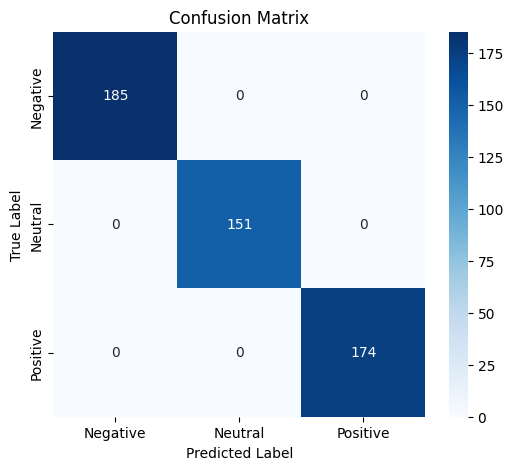

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# from rich.console import Console

# اطمینان از عدم وجود مقادیر None یا NaN در ستون 'Content'
df_balanced['Content'] = df_balanced['Content'].fillna('')

# # استخراج Uni-gram و Bi-gram با استفاده از CountVectorizer
# vectorizer = CountVectorizer(ngram_range=(1, 2))  # Uni-gram (1) و Bi-gram (2)

# استفاده از Uni-gram و Bi-gram 
X = df_balanced[['Uni-grams', 'Bi-grams']]

# # تبدیل متن‌ها به ویژگی‌های عددی
# X = vectorizer.fit_transform(df_balanced['Content'])

# هدف (Sentiment_Class) از قبل ایجاد شده است
y = df_balanced['label']

# تقسیم داده‌ها به داده‌های آموزشی و آزمایشی
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ساخت مدل رگرسیون لجیستیک
model = LogisticRegression()

# آموزش مدل
model.fit(X_train, y_train)

# پیش‌بینی بر روی داده‌های آزمایشی
y_pred = model.predict(X_test)

# ارزیابی مدل
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

console = Console()
console.print("[bold red]Logistic Regression[/bold red]")

# چاپ نتایج ارزیابی
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# نمایش ماتریس سردرگمی
conf_matrix = confusion_matrix(y_test, y_pred)

# ترسیم ماتریس سردرگمی
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Random Forest

Random Forest

Accuracy: 1.00
Recall: 1.00
F1-score: 1.00


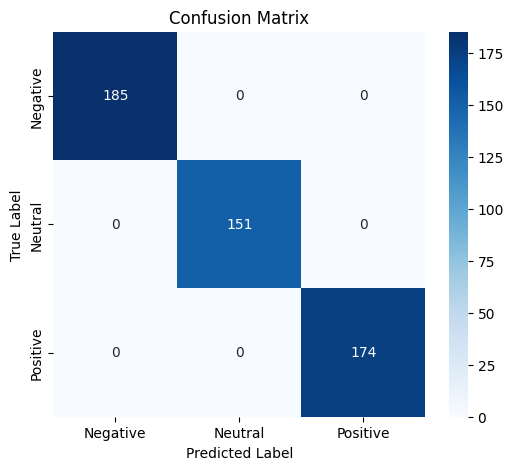

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# اطمینان از عدم وجود مقادیر None یا NaN در ستون 'Content'
df_balanced['Content'] = df_balanced['Content'].fillna('')

# استفاده از Uni-gram و Bi-gram 
X = df_balanced[['Uni-grams', 'Bi-grams']]

# تبدیل متن‌ها به ویژگی‌های عددی
X = vectorizer.fit_transform(df_balanced['Content'])

# هدف (Sentiment_Class) از قبل ایجاد شده است
y = df_balanced['label']

# تقسیم داده‌ها به داده‌های آموزشی و آزمایشی
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ساخت مدل جنگل تصادفی (Random Forest)
model = RandomForestClassifier(random_state=42)

# آموزش مدل
model.fit(X_train, y_train)

# پیش‌بینی بر روی داده‌های آزمایشی
y_pred = model.predict(X_test)

# ارزیابی مدل
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

console = Console()
console.print("[bold red]Random Forest[/bold red]")

# چاپ نتایج ارزیابی
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# نمایش ماتریس سردرگمی
conf_matrix = confusion_matrix(y_test, y_pred)

# ترسیم ماتریس سردرگمی
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Naive Bayes

Naive Bayes

Accuracy: 0.99
Recall: 0.99
F1-score: 0.99


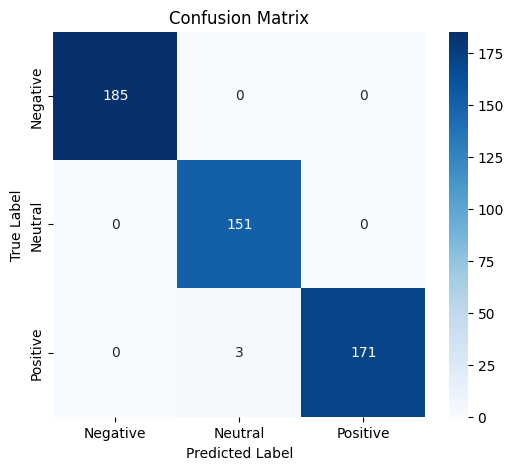

In [48]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# اطمینان از عدم وجود مقادیر None یا NaN در ستون 'Content'
df_balanced['Content'] = df_balanced['Content'].fillna('')

# استفاده از Uni-gram و Bi-gram 
X = df_balanced[['Uni-grams', 'Bi-grams']]

# تبدیل متن‌ها به ویژگی‌های عددی
X = vectorizer.fit_transform(df_balanced['Content'])

# هدف (Sentiment_Class) از قبل ایجاد شده است
y = df_balanced['label']

# تقسیم داده‌ها به داده‌های آموزشی و آزمایشی
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ساخت مدل Naive Bayes
model = MultinomialNB()

# آموزش مدل
model.fit(X_train, y_train)

# پیش‌بینی بر روی داده‌های آزمایشی
y_pred = model.predict(X_test)

# ارزیابی مدل
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

console = Console()
console.print("[bold red]Naive Bayes[/bold red]")

# چاپ نتایج ارزیابی
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# نمایش ماتریس سردرگمی
conf_matrix = confusion_matrix(y_test, y_pred)

# ترسیم ماتریس سردرگمی
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Ensemble Methods (VotingClassifier)

Ensemble(KNN, Decision Tree) Methods

Accuracy: 0.99
Recall: 0.99
F1-score: 0.99


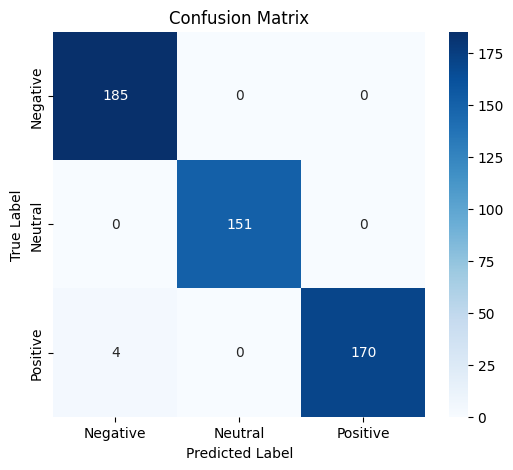

In [49]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# اطمینان از عدم وجود مقادیر None یا NaN در ستون 'Content'
df_balanced['Content'] = df_balanced['Content'].fillna('')

# استفاده از Uni-gram و Bi-gram 
X = df_balanced[['Uni-grams', 'Bi-grams']]

# تبدیل متن‌ها به ویژگی‌های عددی
X = vectorizer.fit_transform(df_balanced['Content'])

# هدف (Sentiment_Class) از قبل ایجاد شده است
y = df_balanced['label']

# تقسیم داده‌ها به داده‌های آموزشی و آزمایشی
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ساخت مدل‌های KNN و Decision Tree
knn_model = KNeighborsClassifier(n_neighbors=3)
dt_model = DecisionTreeClassifier(random_state=42)

# ساخت مدل VotingClassifier که از مدل‌های KNN و Decision Tree استفاده می‌کند
ensemble_model = VotingClassifier(estimators=[('knn', knn_model), ('dt', dt_model)], voting='hard')

# آموزش مدل
ensemble_model.fit(X_train, y_train)

# پیش‌بینی بر روی داده‌های آزمایشی
y_pred = ensemble_model.predict(X_test)

# ارزیابی مدل
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

console = Console()
console.print("[bold red]Ensemble(KNN, Decision Tree) Methods[/bold red]")

# چاپ نتایج ارزیابی
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# نمایش ماتریس سردرگمی
conf_matrix = confusion_matrix(y_test, y_pred)

# ترسیم ماتریس سردرگمی
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Word 2 Vec

In [54]:
import gensim
from gensim.models import Word2Vec

# توکنایز کردن متن‌ها
# توکنایز کردن هر متن به لیستی از کلمات
sentences = df['Content'].apply(word_tokenize)

# آموزش مدل Word2Vec
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# ذخیره مدل آموزش‌داده‌شده
model.save("word2vec_model")

# مشاهده بردار کلمه خاص
word_vector = model.wv['good']  # بردار مربوط به کلمه 'good'
print(f"Word vector for 'good':\n{word_vector}")

# پیدا کردن کلمات مشابه با کلمه 'good'
similar_words = model.wv.most_similar('good', topn=5)
print(f"Most similar words to 'good':\n{similar_words}")

# مشاهده بردار کلمه خاص برای 'bad'
word_vector_bad = model.wv['bad']  # بردار مربوط به کلمه 'bad'
print(f"Word vector for 'bad':\n{word_vector_bad}")

# پیدا کردن کلمات مشابه با کلمه 'bad'
similar_words_bad = model.wv.most_similar('bad', topn=5)
print(f"Most similar words to 'bad':\n{similar_words_bad}")


Word vector for 'good':
[-0.06678925  0.11877469  0.00264744 -0.00982171 -0.00515866 -0.2175892
  0.07087032  0.25506544 -0.09642538 -0.06388383 -0.03773881 -0.18269269
 -0.04281898  0.06887072  0.0434062  -0.04332122  0.05731684 -0.10124869
 -0.05156823 -0.23812509  0.05802581  0.03899481  0.11381959 -0.06676672
 -0.0209379   0.0359144  -0.07197217 -0.08295349 -0.11384498  0.01246406
  0.14351885  0.03466186  0.06005342 -0.08078703 -0.03270781  0.1547274
  0.02864781 -0.08656185 -0.05745055 -0.21533178  0.01925047 -0.1556234
 -0.08848668 -0.05694298  0.11778586 -0.02761147 -0.07933359  0.00313757
  0.07877252  0.07334894  0.07738542 -0.06451649 -0.02488372 -0.00500557
 -0.08456255  0.04906107  0.06574809 -0.03068519 -0.14096415  0.03775337
  0.05783132  0.05029644  0.023391   -0.00842659 -0.13064627  0.12150683
  0.05971913  0.07153977 -0.14034458  0.12207892 -0.06550348  0.058069
  0.10330037 -0.02580958  0.12153175  0.10149644  0.03700906 -0.00340716
 -0.06381335 -0.00417997 -0.0417

## VADAR using Worc2Vec

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\AFERI/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                             Content VADER_SentimentAnalysis
0  great central location rooms small perfectstay...                positive
1  breakfastbreakfast actually average area impro...                positive
2                             centralstayed december                 neutral
3  room bit cold went heating bit quirky did goin...                positive
4  unfortunately way vegan options included break...                positive

 **Performance Metrics:**
Metric         Value
----------------------
Accuracy    0.55
Recall      0.55
F1-Score    0.54


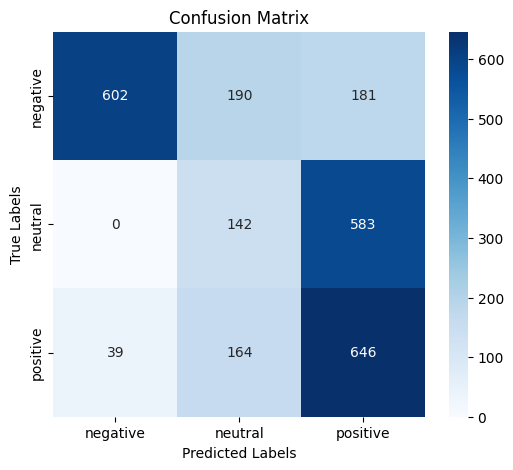

In [10]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# بارگذاری داده‌ها و توکنایز کردن متن‌ها
nltk.download('vader_lexicon')

# ایجاد شیء تحلیل احساس VADER
sia = SentimentIntensityAnalyzer()

# تابع برای تحلیل احساس با استفاده از VADER
def analyze_sentiment(text):
    sentiment_score = sia.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        return 'positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# اعمال تحلیل احساس بر روی ستون 'Content' 
df_balanced['VADER_SentimentAnalysis'] = df_balanced['Content'].apply(analyze_sentiment)

# نمایش نتایج تحلیل احساس
print(df_balanced[['Content', 'VADER_SentimentAnalysis']].head())

# تعریف برچسب‌های واقعی
labels = ['negative', 'neutral', 'positive']

# تبدیل برچسب‌ها به مقادیر عددی
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df_balanced['Label_Num'] = df_balanced['label'].map(label_mapping)

# محاسبه معیارهای ارزیابی مدل
accuracy = accuracy_score(df_balanced['Label_Num'], df_balanced['VADER_SentimentAnalysis'].map(label_mapping))
recall = recall_score(df_balanced['Label_Num'], df_balanced['VADER_SentimentAnalysis'].map(label_mapping), average='weighted')
f1 = f1_score(df_balanced['Label_Num'], df_balanced['VADER_SentimentAnalysis'].map(label_mapping), average='weighted')

# نمایش معیارها در قالب جدول
print("\n **Performance Metrics:**")
print(f"{'Metric':<12}{'Value':>8}")
print(f"{'-'*22}")
print(f"{'Accuracy':<12}{accuracy:.2f}")
print(f"{'Recall':<12}{recall:.2f}")
print(f"{'F1-Score':<12}{f1:.2f}")

# محاسبه و نمایش ماتریس سردرگمی
conf_matrix = confusion_matrix(df_balanced['Label_Num'], df_balanced['VADER_SentimentAnalysis'].map(label_mapping), labels=[0, 1, 2])

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## Textblob using Word2Vec

                                             Content  Polarity_Score_TextBlob  \
0  great central location rooms small perfectstay...                 0.183333   
1  breakfastbreakfast actually average area impro...                -0.075000   
2                             centralstayed december                 0.000000   
3  room bit cold went heating bit quirky did goin...                 0.251667   
4  unfortunately way vegan options included break...                 0.200000   

   Subjectivity_Score_TextBlob TextBlob_Word2Vec_SentimentAnalysis  
0                     0.466667                            positive  
1                     0.200000                             neutral  
2                     0.000000                             neutral  
3                     0.640000                            positive  
4                     0.613889                            positive  
Accuracy: 0.63
Recall: 0.63
F1-score: 0.64


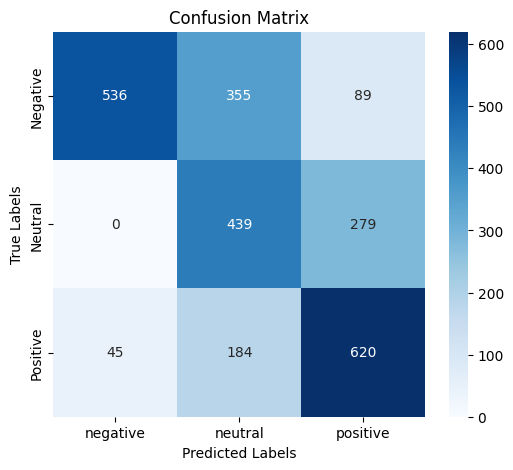

In [53]:
from textblob import TextBlob
from nltk.tokenize import word_tokenize
import numpy as np
import gensim
from gensim.models import Word2Vec
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

# توکنایز کردن متن‌ها
sentences = df_balanced['Content'].apply(word_tokenize)

# آموزش مدل Word2Vec
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# تابع برای استخراج میانگین بردارهای کلمات یک جمله
def get_sentence_vector(sentence, model):
    sentence_vector = np.zeros(100)  # فرض می‌کنیم بردارهای کلمات طول 100 دارند
    words = word_tokenize(sentence)
    word_count = 0
    for word in words:
        if word in model.wv:
            sentence_vector += model.wv[word]
            word_count += 1
    if word_count > 0:
        sentence_vector /= word_count  # میانگین بردارهای کلمات جمله
    return sentence_vector

# تابع برای انجام تحلیل احساس با TextBlob
def analyze_sentiment_textblob_with_word2vec(text, model):
    if isinstance(text, str):
        # استخراج بردار معنایی جمله از مدل Word2Vec
        sentence_vector = get_sentence_vector(text, model)
        
        # ایجاد یک شیء TextBlob برای تحلیل احساس
        blob = TextBlob(text)
        # محاسبه نمرات polarity و subjectivity
        sentiment = blob.sentiment
        return {
            'Polarity': sentiment.polarity,
            'Subjectivity': sentiment.subjectivity,
            'Sentence_Vector': sentence_vector
        }
    return {'Polarity': 0, 'Subjectivity': 0, 'Sentence_Vector': np.zeros(100)}

# اعمال تحلیل احساس با TextBlob بر روی ستون 'Content' همراه با Word2Vec
df_balanced['Sentiment_TextBlob_Word2Vec'] = df_balanced['Content'].apply(lambda x: analyze_sentiment_textblob_with_word2vec(x, model))

# استخراج نمرات Polarity و Subjectivity از نتایج تحلیل
df_balanced['Polarity_Score_TextBlob'] = df_balanced['Sentiment_TextBlob_Word2Vec'].apply(lambda x: x.get('Polarity', 0))
df_balanced['Subjectivity_Score_TextBlob'] = df_balanced['Sentiment_TextBlob_Word2Vec'].apply(lambda x: x.get('Subjectivity', 0))

# اضافه کردن ستون 'TextBlob_Word2Vec_SentimentAnalysis' بر اساس مقدار 'Polarity_Score_TextBlob'
def get_textblob_sentiment_analysis(polarity_score):
    if polarity_score > 0.1:
        return 'positive'
    elif polarity_score < -0.1:
        return 'negative'
    else:
        return 'neutral'

df_balanced['TextBlob_Word2Vec_SentimentAnalysis'] = df_balanced['Polarity_Score_TextBlob'].apply(get_textblob_sentiment_analysis)

# نمایش دیتافریم بعد از تحلیل احساس با TextBlob و Word2Vec
print(df_balanced[['Content', 'Polarity_Score_TextBlob', 'Subjectivity_Score_TextBlob', 'TextBlob_Word2Vec_SentimentAnalysis']].head())

# محاسبه دقت (Accuracy)
accuracy = accuracy_score(df_balanced['label'], df_balanced['TextBlob_Word2Vec_SentimentAnalysis'])

# محاسبه Recall
recall = recall_score(df_balanced['label'], df_balanced['TextBlob_Word2Vec_SentimentAnalysis'], average='weighted')

# محاسبه F1-score
f1 = f1_score(df_balanced['label'], df_balanced['TextBlob_Word2Vec_SentimentAnalysis'], average='weighted')

# چاپ نتایج ارزیابی
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# محاسبه ماتریس سردرگمی
conf_matrix = confusion_matrix(df_balanced['label'], df_balanced['TextBlob_Word2Vec_SentimentAnalysis'])

# رسم ماتریس سردرگمی
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['negative', 'neutral', 'positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
